In [2]:
from keras.datasets import boston_housing
(train_data,train_targets),(test_data,test_targets)=boston_housing.load_data()

D:\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
train_data.shape
test_data.shape
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [4]:
# normalize the data
mean=train_data.mean(axis=0)
train_data -= mean
std=train_data.std(axis=0)
train_data /= std

# The quantities used for normalizing the test data have been computed  using the training data
# We should never use any quantity computed on the test data
test_data -= mean
test_data /=std

In [9]:
from keras import models
from keras import layers

def build_model():
    model=models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    # mse -- Mean Squared Error
    # mae -- Mean Absolute Error
    model.compile('rmsprop','mse',['mae'])
    return model

In [10]:
# k-fold validation (for small datasets)
import numpy as np

k=4
num_val_samples=len(train_data)//k
num_epochs=100
all_scores=[]
for i in range(k):
    print('processing fold #',i)
    val_data=train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets=train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    partial_train_data=np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]],axis=0)
    partial_train_targets=np.concatenate([train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:]],axis=0)
    
    model=build_model()
    # train the model in silent mode, verbose=0
    model.fit(partial_train_data,partial_train_targets,epochs=num_epochs,batch_size=1,verbose=0)
    val_mse, val_mae=model.evaluate(val_data,val_targets,verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [12]:
all_scores
np.mean(all_scores)

2.448802693793089

In [14]:
# save the validation logs at each fold
num_epochs=500
all_mae_histories=[]
for i in range(k):
    print('processing fold #',i)
    val_data=train_data[i*num_val_samples:(i+1)*num_val_samples]
    val_targets=train_targets[i*num_val_samples:(i+1)*num_val_samples]
    
    partial_train_data=np.concatenate([train_data[:i*num_val_samples], train_data[(i+1)*num_val_samples:]],axis=0)
    partial_train_targets=np.concatenate([train_targets[:i*num_val_samples], train_targets[(i+1)*num_val_samples:]],axis=0)
    
    model=build_model()
    history=model.fit(partial_train_data,partial_train_targets,validation_data=(val_data,val_targets),epochs=num_epochs,batch_size=1,verbose=0)
    mae_history=history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)
    
average_mae_history=[np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
print(average_mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
[4.713649690741359, 3.4433136328612224, 3.077103965353258, 2.8383532774330367, 2.8120002864611027, 2.6446350576853987, 2.6205137873640156, 2.588817917474426, 2.547790694944929, 2.5477477158650315, 2.5646910336938236, 2.6546836607527022, 2.492351723189401, 2.4293376160140085, 2.458935573549554, 2.4008443508998, 2.426344148003229, 2.455803465135027, 2.2738266616764635, 2.488695734798318, 2.391299578222898, 2.366884494772052, 2.3058304019493634, 2.3161364180026673, 2.6325541852724434, 2.2997366496832066, 2.2898199381214557, 2.497056761000416, 2.3619708353930178, 2.3322869657289864, 2.4255093218076347, 2.4700459631362763, 2.225815150997426, 2.358533443790851, 2.4047093686490957, 2.23905340043625, 2.2386370696643794, 2.377563727964269, 2.386515914803684, 2.297085678813481, 2.318193769691014, 2.3188169970370756, 2.3234456635937835, 2.266405421908539, 2.2332362668349006, 2.3920077392370396, 2.208018161282681, 2.31

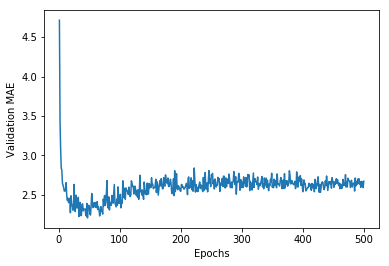

In [15]:
# plot the validation scores
import matplotlib.pyplot as plt

plt.plot(range(1,len(average_mae_history)+1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

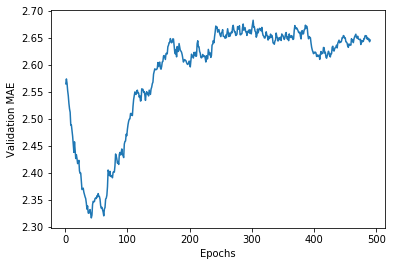

In [16]:
# exclude the first 10 data points
def smooth_curve(points, factor=0.9):
    smoothed_points=[]
    for point in points:
        if smoothed_points:
            previous=smoothed_points[-1]
            smoothed_points.append(previous*factor+point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history=smooth_curve(average_mae_history[10:])

plt.plot(range(1,len(smooth_mae_history)+1),smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [20]:
# train the final model 
model=build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16,verbose=0)
test_mse_score, test_mae_score=model.evaluate(test_data,test_targets)
print(test_mae_score)

102/102 [==============================] - 0s 815us/step
2.5747530413608923
